In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


2051
60000
28
28
2051
10000
28
28
train  (60000, 28, 28)
train labels  (60000,)
test images  (10000, 28, 28)
test labels  (10000,)
5


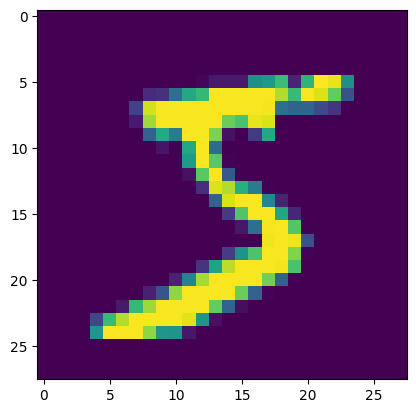

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

def loader_images(file_path):
    with open(file_path,"rb") as f:
        magicNumber = int.from_bytes(f.read(4),"big");
        noOfImages = int.from_bytes(f.read(4),"big");
        row = int.from_bytes(f.read(4),"big");
        col = int.from_bytes(f.read(4),"big");
        print(magicNumber);
        print(noOfImages);
        print(row);
        print(col);
        images = f.read();
        return np.frombuffer(images,dtype=np.uint8).reshape(noOfImages,row,col);

def loader_labels(file_path):
    with open(file_path,"rb") as f:
        magicNumber = int.from_bytes(f.read(4),"big");
        NoOfLabels = int.from_bytes(f.read(4),"big");
        return np.frombuffer(f.read(),dtype=np.uint8);
train_images = loader_images("/kaggle/input/mnist-dataset/train-images.idx3-ubyte");
train_labels = loader_labels("/kaggle/input/mnist-dataset/train-labels.idx1-ubyte");
test_images = loader_images("/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte");
test_labels = loader_labels("/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte");
print("train ",train_images.shape);
print("train labels ",train_labels.shape);
print("test images ",test_images.shape);
print("test labels ",test_labels.shape);

plt.imshow(train_images[0]);
print(train_labels[0]);
plt.show();

In [5]:

train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)


train_images = train_images / 255.0
test_images = test_images / 255.0


input_size = 784 
hidden_size = 512  
output_size = 10  


def xavier_init(size):
    return np.random.randn(*size) * np.sqrt(2.0 / size[0])


W1 = xavier_init((input_size, hidden_size)) 
b1 = np.zeros((1, hidden_size)) 
W2 = xavier_init((hidden_size, output_size)) 
b2 = np.zeros((1, output_size)) 

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def forward_propagation(X):
    z1 = np.dot(X, W1) + b1  
    a1 = relu(z1)  
    z2 = np.dot(a1, W2) + b2  
    a2 = softmax(z2)  
    return a1, a2


def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    print(y_true.shape[0]);
    print(y_pred.shape[0],y_pred.shape[1]);
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss


def backpropagation(X, y_true, a1, a2):
    m = X.shape[0]
    dZ2 = a2
    dZ2[range(m), y_true] -= 1 
    dZ2 /= m
    
    dW2 = np.dot(a1.T, dZ2)  
    db2 = np.sum(dZ2, axis=0, keepdims=True) 


    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (a1 > 0)  
    dW1 = np.dot(X.T, dZ1)  
    db1 = np.sum(dZ1, axis=0, keepdims=True)  

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.001):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


epochs = 10
batch_size = 64  
learning_rate = 0.001
for epoch in range(epochs):
    
    indices = np.random.permutation(train_images.shape[0])
    train_images_shuffled = train_images[indices]
    train_labels_shuffled = train_labels[indices]

    for i in range(0, train_images.shape[0], batch_size):
        X_batch = train_images_shuffled[i:i+batch_size]
        y_batch = train_labels_shuffled[i:i+batch_size]

        
        a1, a2 = forward_propagation(X_batch)

    
        loss = cross_entropy_loss(y_batch, a2)

    
        dW1, db1, dW2, db2 = backpropagation(X_batch, y_batch, a1, a2)


        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    
    
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")


def predict(X):
    _, a2 = forward_propagation(X)
    return np.argmax(a2, axis=1)


predictions = predict(test_images)
accuracy = np.mean(predictions == test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
64
64 10
6